In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('FIFA_train.csv')

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,18.520526
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,18.092177
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,18.197537
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,17.747336
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,18.035018


### EDA & Feature extraction

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
train.continent.unique()

array(['south america', 'europe', 'africa', 'asia', 'oceania'],
      dtype=object)

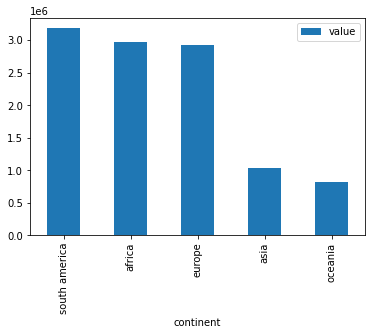

In [ ]:
import matplotlib.pyplot as plt
train[['continent', 'value']].groupby('continent').mean().sort_values(by='value', ascending=False).plot.bar()

In [ ]:
train.position.unique()

array(['ST', 'GK', 'DF', 'MF'], dtype=object)

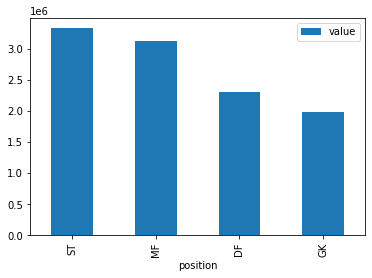

In [ ]:
train[['position', 'value']].groupby('position').mean().sort_values(by='value', ascending=False).plot.bar()

In [ ]:
position = train['position'].unique()

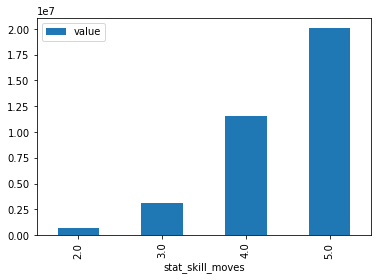

In [ ]:
train.loc[train.position == 'ST', ['stat_skill_moves', 'value']].groupby('stat_skill_moves').mean().plot.bar()

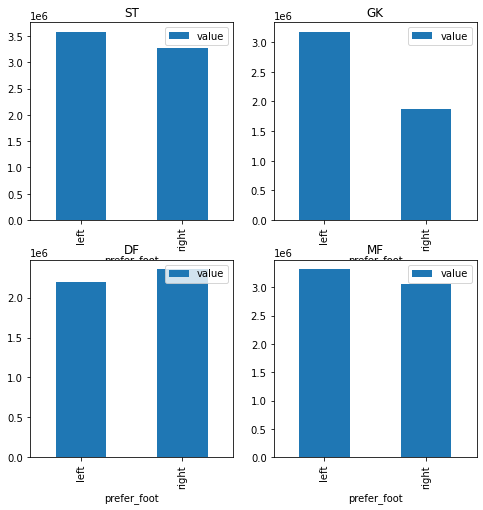

In [ ]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax = ax.ravel()
for i, p in enumerate(position):
  train.loc[train.position==p, ['prefer_foot', 'value']].groupby('prefer_foot').mean().plot.bar(ax=ax[i])
  ax[i].set_title(p)

plt.show() # 다른 포지션에 비해 골키퍼의 경우 왼발/오른발에 따라 두배 정도 차이가 남 (왼손/오른손?)

In [ ]:
print("골키퍼 :", train[train.position=='GK'].value.mean())
print("not 골키퍼 :", train[train.position!='GK'].value.mean()) # 별 차이는 없다

골키퍼 : 13.113184650182161
not 골키퍼 : 13.880493911104157


In [ ]:
train.reputation.value_counts()

1.0    8014
2.0     706
3.0     177
4.0      31
5.0       4
Name: reputation, dtype: int64

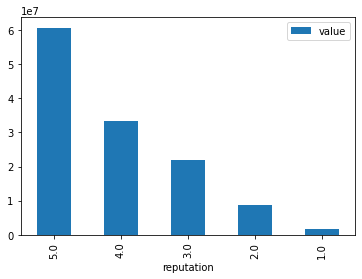

In [ ]:
train[['reputation', 'value']].groupby('reputation').mean().sort_values(by='value', ascending=False).plot.bar() # 전처리 필요???

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


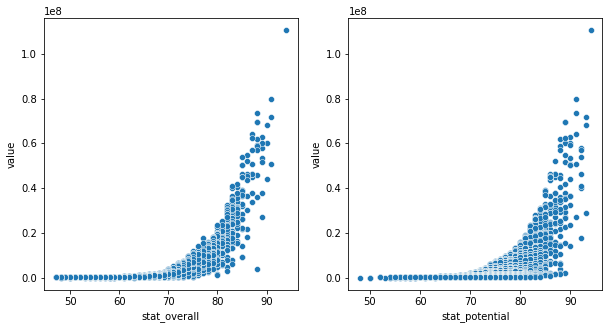

In [ ]:
import seaborn as sns
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot('stat_overall', 'value', data=train, ax=ax[0])
sns.scatterplot('stat_potential', 'value', data=train, ax=ax[1])

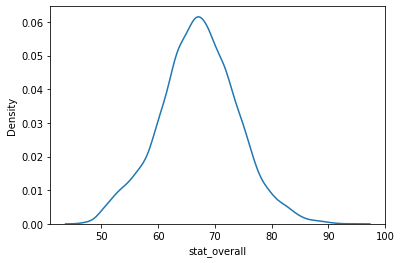

In [ ]:
sns.kdeplot(train.stat_overall)

In [ ]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
train.contract_until.unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [ ]:
train['contract_until'] = train.contract_until.astype(str).str[-4:]
train.contract_until.unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [ ]:
test['contract_until'] = test.contract_until.astype(str).str[-4:]

In [ ]:
train['contract_until'] = train.contract_until.astype(int)
train.contract_until.dtype

dtype('int64')

In [ ]:
test['contract_until'] = test.contract_until.astype(int)
test.contract_until.dtype

dtype('int64')

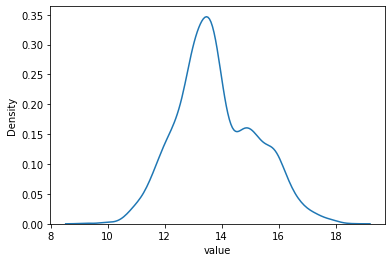

In [ ]:
sns.kdeplot(train.value)

In [ ]:
train.value = np.log1p(train.value)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


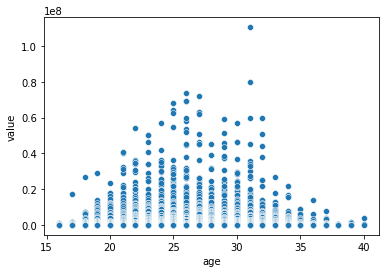

In [ ]:
sns.scatterplot('age', 'value', data=train)

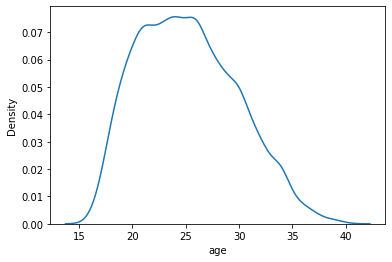

In [ ]:
sns.kdeplot(train.age)

In [ ]:
X_tr = train.drop(['name', 'id', 'value'], axis=1)
y_tr = train['value']

In [ ]:
test = test.drop(['name', 'id'], axis=1)

In [ ]:
X_tr.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,south america,2021,ST,left,5.0,94,94,4.0
1,27,europe,2020,GK,right,4.0,91,93,1.0
2,31,south america,2021,ST,right,5.0,91,91,3.0
3,32,europe,2020,DF,right,4.0,91,91,3.0
4,25,europe,2021,GK,right,3.0,90,93,1.0


In [ ]:
X_tr = pd.get_dummies(columns = ['continent', 'position', 'prefer_foot'], data=X_tr)

In [ ]:
test = pd.get_dummies(columns = ['continent', 'position', 'prefer_foot'], data=test)

In [ ]:
X_tr.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,2021,5.0,94,94,4.0,0,0,0,0,1,0,0,0,1,1,0
1,27,2020,4.0,91,93,1.0,0,0,1,0,0,0,1,0,0,0,1
2,31,2021,5.0,91,91,3.0,0,0,0,0,1,0,0,0,1,0,1
3,32,2020,4.0,91,91,3.0,0,0,1,0,0,1,0,0,0,0,1
4,25,2021,3.0,90,93,1.0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
test.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,33,2022,5.0,94,94,5.0,0,0,1,0,0,0,0,0,1,0,1
1,26,2022,5.0,92,93,5.0,0,0,0,0,1,0,0,0,1,0,1
2,27,2023,4.0,91,92,4.0,0,0,1,0,0,0,0,1,0,0,1
3,27,2020,4.0,91,91,4.0,0,0,1,0,0,0,0,0,1,0,1
4,32,2020,4.0,91,91,4.0,0,0,1,0,0,0,0,1,0,0,1


### Building models

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=b4665342af9b21ee4e22fce76157b24696583b80b3db28f5934d17e5594d3e92
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# use bayesian optimizer
from bayes_opt import BayesianOptimization

#### XGBoost

In [ ]:
# XGBoostRegressor + BayesianOptimization

pbounds = { 'learning_rate': (0.0001, 0.4),
            'n_estimators': (16, 1024),
            'max_depth': (3,10),   
            'subsample': (0.5, 1),  
            'colsample_bytree': (0.5, 1),   
            'gamma': (0, 5)}

def xgb_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma):
    
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample_bytree,   
        'gamma': gamma,
        'n_jobs' : -1,
        'random_state' : 777
    }
    
    xgb = XGBRegressor(**params)
    
    kf = KFold(n_splits = 4 , shuffle=True, random_state=50)

    score = cross_val_score(xgb, X_tr, y_tr, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)

BO_xgb.maximize(init_points = 10, n_iter = 50)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.07679  |  0.7744   |  3.576    |  0.2411   |  6.814    |  443.0    |  0.8229   |
|  2        | -0.08194  |  0.7188   |  4.459    |  0.3855   |  5.684    |  814.1    |  0.7644   |
|  3        | -22.56    |  0.784    |  4.628    |  0.02851  |  3.61     |  36.38    |  0.9163   |
|  4        | -0.0768   |  0.8891   |  4.35     |  0.3914   |  8.594    |  481.2    |  0.8903   |
|  5        | -0.0739   |  0.5591   |  3.2      |  0.05743  |  9.613    |  542.0    |  0.7073   |
|  6        | -0.08364  |  0.6323   |  3.871    |  0.1825   |  6.979    |  34.94    |  0.8088   |
|  7        | -0.07169  |  0.806    |  3.085    |  0.3775   |  7.773    |  378.4    |  0.7185   |
|  8        | -0.04656  |  0.8488   |  0.3011   |  0.2667   |  7.694    |  228.1    |  0.5645   |
|  9        | -0.067

In [ ]:
BO_xgb.max

{'params': {'colsample_bytree': 0.972782555703169,
  'gamma': 0.14492251855876825,
  'learning_rate': 0.2429332410805271,
  'max_depth': 7.437516014721604,
  'n_estimators': 477.19541006114633,
  'subsample': 0.7146376647048138},
 'target': -0.04237150718241418}

In [ ]:
params = BO_xgb.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))

xgb = XGBRegressor(random_state = 777, **params)

xgb.fit(X_tr, y_tr)

[14:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.972782555703169, gamma=0.14492251855876825,
             learning_rate=0.2429332410805271, max_depth=7, n_estimators=477,
             random_state=777, subsample=0.7146376647048138)

In [ ]:
pred_xgb = np.expm1(xgb.predict(test))

#### Gradient Boosting

In [ ]:
# GradientBoostingRegressor + BayesianOptimization

pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (16, 512),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'min_samples_split': (2,5),   
            'min_samples_leaf': (1,5)}

def gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):

    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'min_samples_split' : int(round(min_samples_split)),
        'min_samples_leaf' : int(round(min_samples_leaf))
    }
    
    gbm = GradientBoostingRegressor(**params)
    kf = KFold(n_splits = 4 , shuffle = True, random_state=50)
    score = cross_val_score(gbm, X_tr, y_tr, scoring='neg_mean_squared_error', cv = kf, n_jobs=-1)
    return np.mean(score)

BO_gbm = BayesianOptimization(f = gbm_opt, pbounds = pbounds, random_state=0)    

BO_gbm.maximize(init_points = 10, n_iter = 50)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.0388   |  0.11     |  8.006    |  3.411    |  3.635    |  226.1    |  0.8229   |
|  2        | -0.0397   |  0.0878   |  9.242    |  4.855    |  3.15     |  408.7    |  0.7644   |
|  3        | -0.04111  |  0.1138   |  9.479    |  1.284    |  2.261    |  26.03    |  0.9163   |
|  4        | -0.0408   |  0.1557   |  9.09     |  4.914    |  4.397    |  244.9    |  0.8903   |
|  5        | -0.04211  |  0.0241   |  7.479    |  1.573    |  4.834    |  274.8    |  0.7073   |
|  6        | -0.1803   |  0.05328  |  8.42     |  2.825    |  3.705    |  25.32    |  0.8088   |
|  7        | -0.04366  |  0.1226   |  7.319    |  4.775    |  4.045    |  194.3    |  0.7185   |
|  8        | -0.07406  |  0.1397   |  3.422    |  3.667    |  4.012    |  120.3    |  0.5645   |
|  9        | -0.045

In [ ]:
BO_gbm.max

{'params': {'learning_rate': 0.08501439130306022,
  'max_depth': 8.233029365965816,
  'min_samples_leaf': 1.1326338509074398,
  'min_samples_split': 2.475729760016842,
  'n_estimators': 99.63724492243509,
  'subsample': 0.9081578047049488},
 'target': -0.037239322043963366}

In [ ]:
params = BO_gbm.max['params']
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['min_samples_leaf'] = int(round(params['min_samples_leaf']))
params['min_samples_split'] = int(round(params['min_samples_split']))

gbm = GradientBoostingRegressor(random_state = 123, **params)
gbm.fit(X_tr, y_tr)
pred_gbm = np.expm1(gbm.predict(test))

In [ ]:
pred_gbm

array([5.81325064e+07, 7.06984274e+07, 6.99227322e+07, ...,
       6.01508826e+04, 5.95162626e+04, 5.93492640e+04])